# Exploratory Data Analysis: Beverage Sales

## Objective
Analyze Beverage Sales data to uncover trends, identify high-performing product categories, and observe differences in regional sales to help improve business strategy.

## Dataset
- Source: Publicly available Beverage Sales Dataset from Kaggle  
- Columns: Order_ID, Customer_ID, Customer_Type, Product, Category, Unit_Price, Quantity, Discount, Total_Price, Region, Order_Date

## Libraries Used
- Pandas
- Numpy
- Matplotlib
- Seaborn
- Kagglehub

In [ ]:
%pip install pandas
%pip install numpy
%pip install matplotlib
%pip install seaborn
%pip install kagglehub

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import zipfile
import os
import kagglehub

# Download the dataset
path = kagglehub.dataset_download("sebastianwillmann/beverage-sales")

In [2]:
# List files to confirm CSV name
print(os.listdir(path))

# Load the CSV
csv_file = os.path.join(path, "synthetic_beverage_sales_data.csv")
df = pd.read_csv(csv_file)

# Preview the dataset
df.head()

['synthetic_beverage_sales_data.csv']


,Order_ID,Customer_ID,Customer_Type,Product,Category,Unit_Price,Quantity,Discount,Total_Price,Region,Order_Date
0,ORD1,CUS1496,B2B,Vio Wasser,Water,1.66,53,0.10,79.18,Baden-Württemberg,2023-08-23
1,ORD1,CUS1496,B2B,Evian,Water,1.56,90,0.10,126.36,Baden-Württemberg,2023-08-23
2,ORD1,CUS1496,B2B,Sprite,Soft Drinks,1.17,73,0.05,81.14,Baden-Württemberg,2023-08-23
3,ORD1,CUS1496,B2B,Rauch Multivitamin,Juices,3.22,59,0.10,170.98,Baden-Württemberg,2023-08-23
4,ORD1,CUS1496,B2B,Gerolsteiner,Water,0.87,35,0.10,27.40,Baden-Württemberg,2023-08-23


In [3]:
# Familiarise with the dataset
df.info()

df.describe()

df.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8999910 entries, 0 to 8999909
Data columns (total 11 columns):
 #   Column         Dtype  
---  ------         -----  
 0   Order_ID       object 
 1   Customer_ID    object 
 2   Customer_Type  object 
 3   Product        object 
 4   Category       object 
 5   Unit_Price     float64
 6   Quantity       int64  
 7   Discount       float64
 8   Total_Price    float64
 9   Region         object 
 10  Order_Date     object 
dtypes: float64(3), int64(1), object(7)
memory usage: 755.3+ MB


Order_ID         0
Customer_ID      0
Customer_Type    0
Product          0
Category         0
Unit_Price       0
Quantity         0
Discount         0
Total_Price      0
Region           0
Order_Date       0
dtype: int64

# Initial Data Check:
The Beverage Sales dataset was downloaded using Kagglehub and loaded into Python.
It contains **11 Columns** and **8999910 entries** .

- There are no missing values.
- Data types are mostly correct as expected.
- The Order_Date column is currently of type 'object'. It will be converted to 'datetime'.

In [4]:
# Convert Order_Date column to date
df['Order_Date'] = pd.to_datetime(df['Order_Date'])

In [5]:
# Calculate Total Sales
total_sales= df['Total_Price'].sum()
print(f"Total Sales: €{total_sales:,.2f}")

Total Sales: €1,176,681,163.35


Region
Hamburg                   82.470772
Hessen                    78.400110
Saarland                  78.390587
Rheinland-Pfalz           75.838677
Mecklenburg-Vorpommern    75.517247
Thüringen                 75.324865
Berlin                    74.567928
Bayern                    72.825399
Niedersachsen             71.959051
Sachsen                   71.946991
Baden-Württemberg         71.594839
Nordrhein-Westfalen       71.393804
Brandenburg               71.349031
Schleswig-Holstein        70.317829
Sachsen-Anhalt            69.765544
Bremen                    65.018489
Name: Total_Price_M, dtype: float64


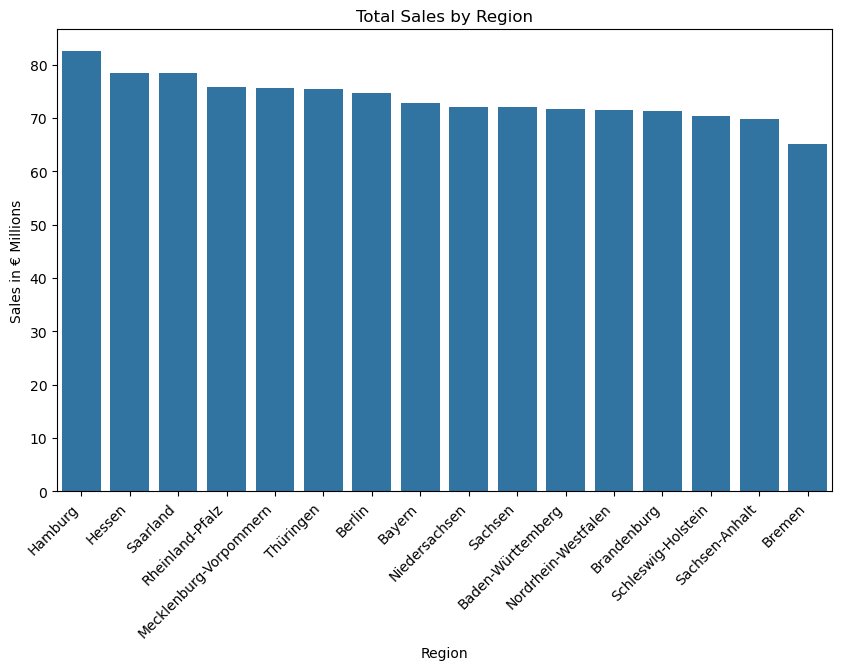

In [7]:
df['Total_Price_M'] = df['Total_Price'] / 1_000_000

sales_by_region = df.groupby('Region')['Total_Price_M'].sum().sort_values(ascending=False)
print(sales_by_region)

plt.figure(figsize=(10,6))
sns.barplot(x=sales_by_region.index, y=sales_by_region.values)
plt.title('Total Sales by Region')
plt.xlabel('Region')
plt.ylabel('Sales in € Millions')

plt.xticks(rotation=45, ha='right')

plt.show()

## Sales by Region Analysis
Comparison of sales across regions revealed that sales figures are relatively close, with no obvious outliers.
From the data, we see that *Hamburg* has the highest total sales followed by *Hessen* and *Saarland*.
This indicates that these regions contribute most to overall revenue. Other regions show moderately similar performance, suggesting fairly balanced sales distribution across the country.

Category
Alcoholic Beverages    911.797920
Juices                 133.167849
Soft Drinks             82.802543
Water                   48.912852
Name: Total_Price_M, dtype: float64


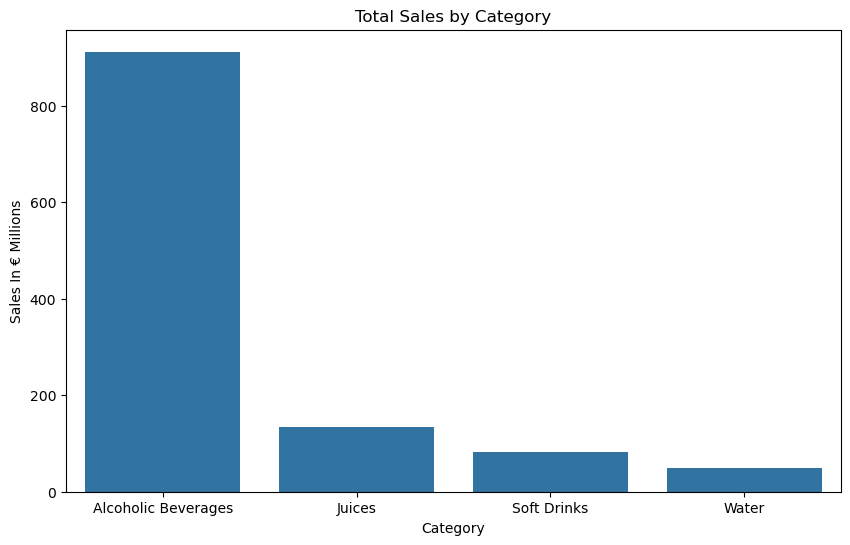

In [8]:
sales_by_category = df.groupby('Category')['Total_Price_M'].sum().sort_values(ascending=False)
print(sales_by_category)

# Bar plot
plt.figure(figsize=(10,6))
sns.barplot(x=sales_by_category.index, y=sales_by_category.values)
plt.title('Total Sales by Category')
plt.xlabel('Category')
plt.ylabel('Sales In € Millions')
plt.show()

## Sales by Category Analysis
**Alcoholic Beverages** make up the vast majority business with **€911,797,920** in sales.
Soft drinks including **Juices**, **Soft Drinks** and **Water** are lagging far behind with **€133,167,849**, **€82,802,543** and **€48,91,852** in sales respectively.
This indicates that the company is primaraly focused onalcoholic beverage sales and soft drink section is contributing significantly less to overall revenue and may require attention.

Product
Veuve Clicquot     202.581898
Moët & Chandon     175.088086
Johnnie Walker      97.261801
Jack Daniels        95.881003
Tanqueray           86.143656
Bacardi             58.467504
Havana Club         58.046964
Sauvignon Blanc     23.319175
Cranberry Juice     23.044831
Riesling            22.661281
Name: Total_Price_M, dtype: float64


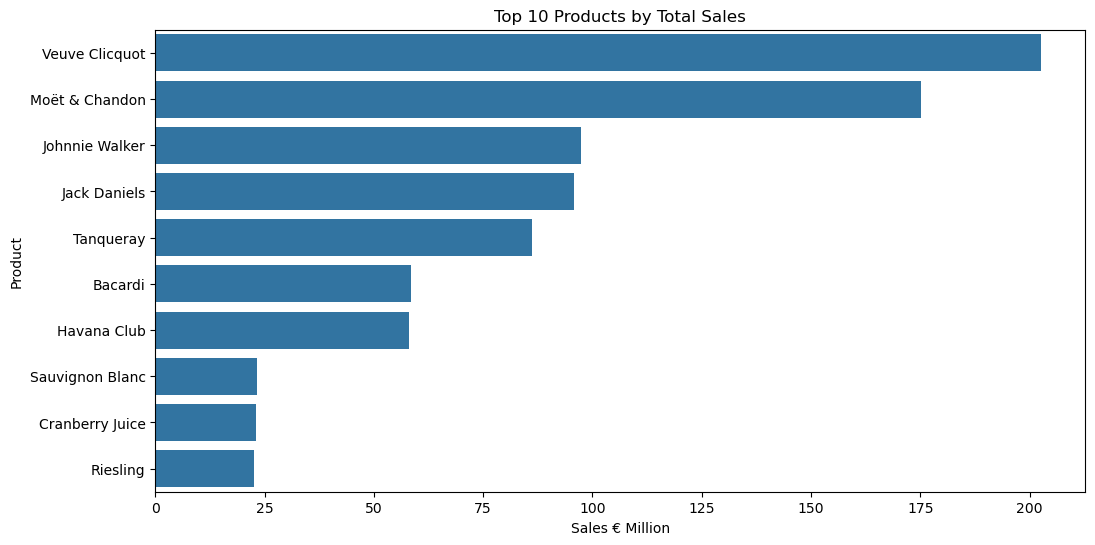

In [9]:
sales_by_product = df.groupby('Product')['Total_Price_M'].sum().sort_values(ascending=False).head(10)
print(sales_by_product)

# Bar plot
plt.figure(figsize=(12,6))
sns.barplot(x=sales_by_product.values, y=sales_by_product.index)
plt.title('Top 10 Products by Total Sales')
plt.xlabel('Sales € Million')
plt.ylabel('Product')
plt.show()

## Top 10 Products by Total Sales
Top seller analysis reveals that **Champagne** is a clear leader in total sales with **Veuve Clicquot** and **Moët & Chandon** leading by a large margin.
**Spirits** occupy the middle positions in the Top 10 chart, contributing moderately to overall revenue. 
**Wine** and **Juice** are at the lower end of the Top 10 chart, suggesting a need for strategy focus to increase their sales performance.

In [10]:
avg_order_value = df.groupby('Order_ID')['Total_Price'].sum().mean()
print(f"Average Order Value: €{avg_order_value:,.2f}")

Average Order Value: €392.23


In [11]:
# Calculate AOV by region
aov_by_region = (
    df.groupby(['Region', 'Order_ID'])['Total_Price'].sum()
    .groupby('Region')
    .mean()
    .sort_values(ascending=False)
)

# Display full results
for region, value in aov_by_region.items():
    print(f"{region}: €{value:,.2f}")

Hessen: €429.96
Mecklenburg-Vorpommern: €415.76
Saarland: €409.84
Hamburg: €409.37
Berlin: €408.44
Brandenburg: €401.70
Thüringen: €400.96
Rheinland-Pfalz: €393.58
Bayern: €392.90
Baden-Württemberg: €388.65
Sachsen-Anhalt: €383.14
Sachsen: €377.05
Nordrhein-Westfalen: €376.31
Niedersachsen: €374.21
Schleswig-Holstein: €372.67
Bremen: €343.31


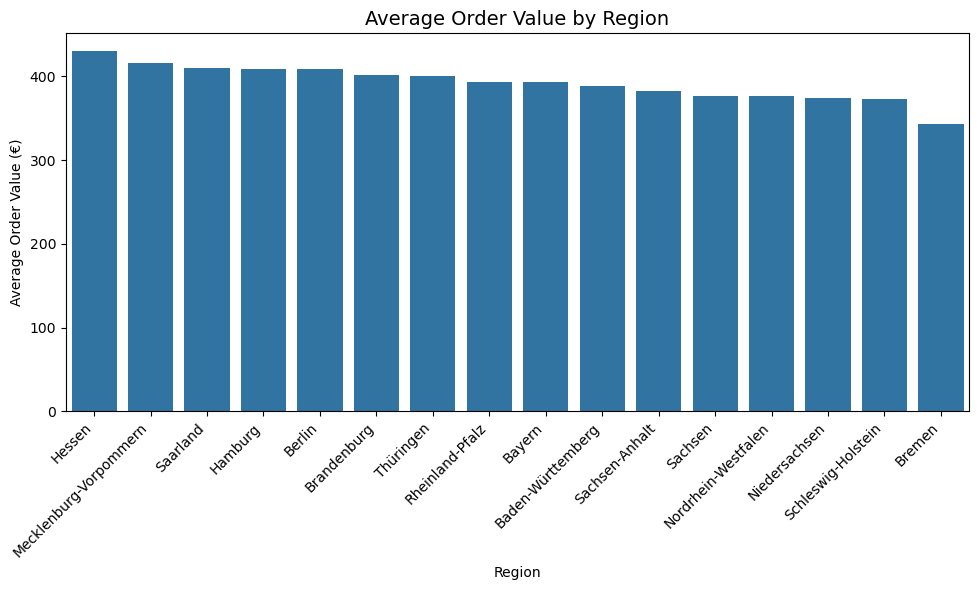

In [12]:
plt.figure(figsize=(10,6))
sns.barplot(x=aov_by_region.index, y=aov_by_region.values)

plt.title('Average Order Value by Region', fontsize=14)
plt.xlabel('Region')
plt.ylabel('Average Order Value (€)')
plt.xticks(rotation=45, ha='right')

plt.tight_layout()
plt.show()

## Average Order by Region
**Average Order** values across the regions are very close showing an relitavely equal distribution throughout the country.

- Overall average order value: **€392.23**
- Highest: **Hessen €429.96**
- Lowest: **Bremen €343.31**
- 
**Bremen** region is underperforming in **Total Sales** and **Average Sales**. A strategy change might be needed for this region to improve performance.

In [13]:
sales_by_segment = df.groupby('Customer_Type')['Total_Price'].sum()
print(sales_by_segment.apply(lambda x: f"€{x:,.0f}"))

Customer_Type
B2B    €901,619,612
B2C    €275,061,551
Name: Total_Price, dtype: object


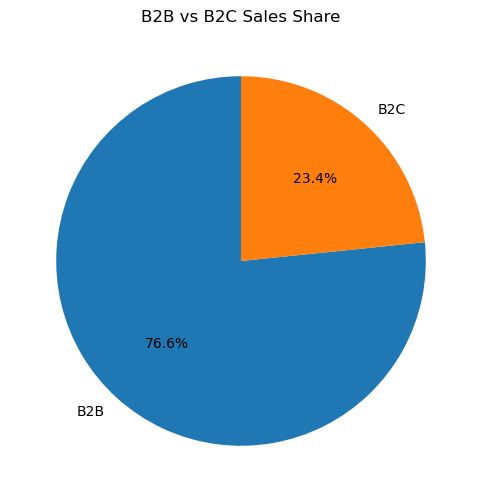

In [14]:
plt.figure(figsize=(6,6))
plt.pie(
    sales_by_segment,
    labels = sales_by_segment.index,
    autopct = '%1.1f%%',
    startangle=90,
)
plt.title('B2B vs B2C Sales Share')
plt.show()

## Sales Share between Businesses and Customers
The pie chart clearly shows majority of sales **76.6%** come from **B2B** sales while only **23.4%** originate from **B2C**
This indicates that the company’s revenue heavily depends on its business-to-business relationships, suggesting that any strategic growth initiatives should either strengthen the B2B segment further or explore opportunities to expand B2C sales.

In [18]:
df['Year'] = df['Order_Date'].dt.year

sales_by_year = df.groupby(['Year', 'Customer_Type'])['Total_Price_M'].sum().unstack()
sales_by_year

Customer_Type,B2B,B2C
Year,,
2021,290.696349,89.350298
2022,303.095802,91.763978
2023,307.827461,93.947276


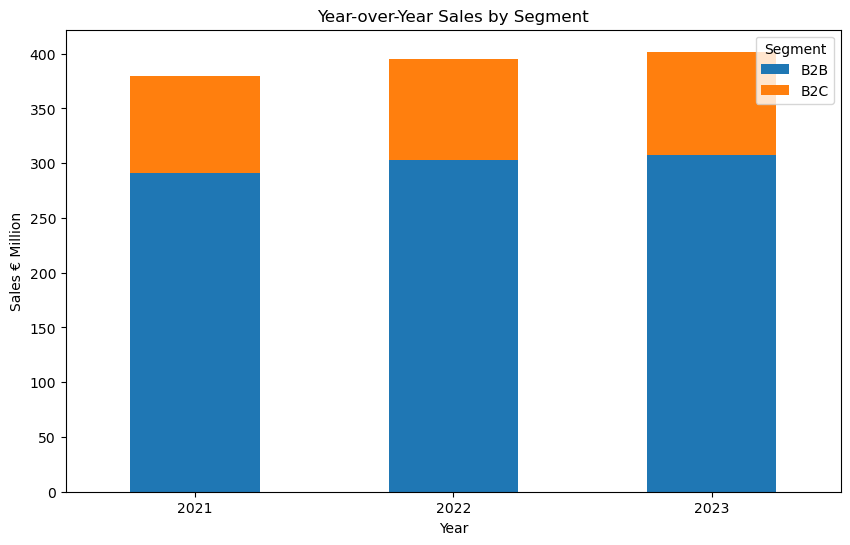

In [19]:
sales_by_year.plot(
    kind = 'bar',
    stacked = True,
    figsize = (10,6),
)

plt.title('Year-over-Year Sales by Segment')
plt.xlabel('Year')
plt.ylabel('Sales € Million')
plt.xticks(rotation=0)
plt.legend(title='Segment')
plt.show()

In [20]:
df['YearMonth'] = df['Order_Date'].dt.to_period('M')

sales_by_month = df.groupby(['YearMonth', 'Customer_Type'])['Total_Price_M'].sum().unstack()
sales_by_month

Customer_Type,B2B,B2C
YearMonth,,
2021-01,24.949103,7.476327
2021-02,22.266405,6.843764
2021-03,25.375774,7.581662
2021-04,23.855249,7.286810
2021-05,24.223343,7.632147
2021-06,23.693436,7.299851
2021-07,24.430253,7.681806
2021-08,24.372693,7.552906
2021-09,23.790285,7.447383


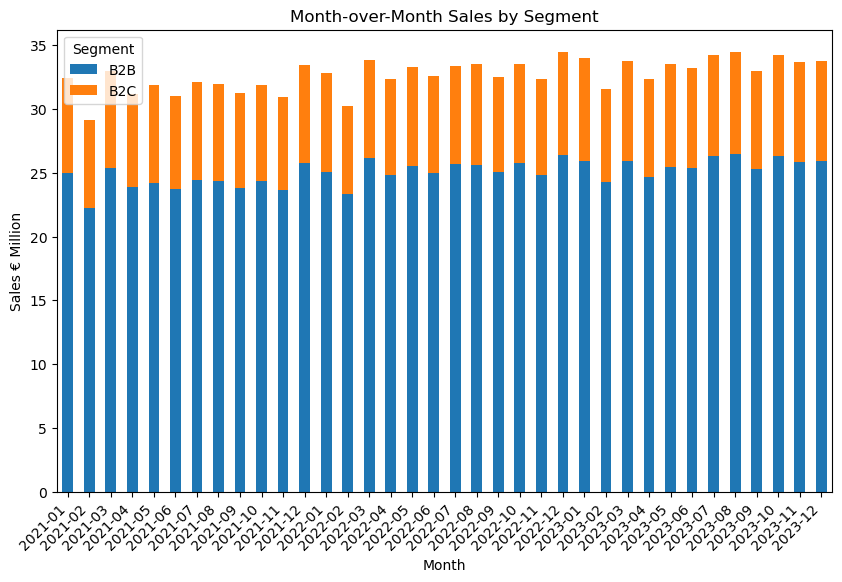

In [21]:
sales_by_month.plot(
    kind = 'bar',
    stacked = True,
    figsize = (10,6),
)
plt.title('Month-over-Month Sales by Segment')
plt.xlabel('Month')
plt.ylabel('Sales € Million')
plt.xticks(rotation=45, ha='right')
plt.legend(title='Segment')
plt.show()

## Sales changes over time
The 3 year period represented in the data shows **modest, but steady year-over-year growth** in total sales.
Distribution of sales between **B2B** and **B2C** over this period remains consistent.
Sales **month-over-month** show steady revenue with slight increases towards the end of the year and a small dip around February. This is in line with seasonally higher beverage consumption around the end of the year and moderation in the first months of the year.